In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [319]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [320]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

# EDA

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We Have Almost 1000 Rows and  40 Columns 

In [322]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [323]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We could see that _39 has null vales in 1000 Rows,hence we remove the same column

In [324]:
df=df.drop(['_c39'],axis=1)

Now Lets find the shape 

In [325]:
df.shape

(1000, 39)

In [326]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('***************************************************************')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
***************************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
***************************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
***************************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
***************************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
***************************************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sal

We have ? in the column ,will replace with no_info

In [327]:
df=df.replace('?','No_info')

Now split the Catogoricakl column and The Numerical colum for the indetailed Analysis

In [328]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

*The count of all the columns are same which means there are no missing values in the dataset.

*The mean value is greater than the median(50%) in most of the columns which means the data is skewed to right in these columns

*The data in the few columns have mean value less than median that means the data is skewed to left

*By summerising the data we can observe there is huge difference between 75% and max in most of the columns hence there are

*outliers present in the data which we will remove them leter on using approprate methods.

*We can also notice the Standard deviation , min, 25% percentile values from this describe method.

In [329]:
#We could observe that the umbrella_limit and capital Loss have a negative value in it .Let us find the counts and replace or remove the same
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

There is negative value in the row

In [330]:
df.loc[df['umbrella_limit']== -1000000]

months_as_customer  age  policy_number policy_bind_date policy_state  \
290                 284   42         526039       04-05-1995           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
290    100/300                500                1338.54        -1000000   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
290       438178  ...         1                 No_info              94160   

    injury_claim property_claim  vehicle_claim  auto_make auto_model  \
290         8560          17120          68480  Chevrolet     Malibu   

    auto_year fraud_reported  
290      1996              N  

[1 rows x 39 columns]

We will Remove The Negavite Index from our Row 

In [331]:
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [332]:
df.shape

(999, 39)

In [217]:
df['capital-loss'].value_counts()

 0        474
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

Hence the capital loss have a direct relation with the dataset we exclude it

In [333]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                 No_info               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                 No_info              87200   
996       608177  ...         3                 No_info             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                 No_info               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [334]:
df['policy_bind_date'].value_counts()

05-08-1992    3
01-01-2006    3
28-04-1992    3
29-01-1998    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: policy_bind_date, Length: 950, dtype: int64

In [335]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [336]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
29-01-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [337]:
#Lets split the column in to date,month and time
df[' incident_date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [338]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... injury_claim property_claim vehicle_claim   auto_make  \
0         466132  ...         6510          13020         52080        Saab   
1         468176  ...          780            780          3510    Mercedes   
2         430632  ...         7700           3850         23100       Dodge   
3         608117  ...         6340           6340         50720   Chevrolet   
4         610706  ...         1300            650          4550      Accura   
..           ...  ...          ...            ...           ...         ...   
995       431289  ...        17440           8720         61040       Honda   
996       608177  ...        18080          18080         72320  Volkswagen   
997       442797  ...         7500           7500         52500      Suburu   
998       441714  ...         5220           5220         36540        Audi   
999       612260  ...          460            920          3680    Mercedes   

    auto_model  auto_year  fraud_reported  incident_date incident_Month  \
0          92x       2004               Y             25             01   
1         E400       2007               Y             21             01   
2          RAM       2007               N             22             02   
3        Tahoe       2014               Y             10             01   
4          RSX       2009               N             17             02   
..         ...        ...             ...            ...            ...   
995     Accord       2006               N             22             02   
996     Passat       2015               N             24             01   
997    Impreza       1996               N             23             01   
998         A5       1998               N             26             02   
999       E400       2007               N             26             02   

    incident_Year  
0            2015  
1            2015  
2            2015  
3            2015  
4            2015  
..            ...  
995          2015  
996          2015  
997          2015  
998          2015  
999          2015  

[999 rows x 42 columns]

In [339]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]


In [340]:
df['policy_bind_date'].value_counts()

05-08-1992    3
01-01-2006    3
28-04-1992    3
29-01-1998    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: policy_bind_date, Length: 950, dtype: int64

In [341]:
df.describe()

months_as_customer         age  policy_number  policy_deductable  \
count          999.000000  999.000000     999.000000         999.000000   
mean           203.873874   38.944945  546258.867868        1136.636637   
std            115.142928    9.144354  257190.966492         611.839681   
min              0.000000   19.000000  100804.000000         500.000000   
25%            115.500000   32.000000  335913.500000         500.000000   
50%            199.000000   38.000000  533940.000000        1000.000000   
75%            276.000000   44.000000  759459.500000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             999.000000    9.990000e+02     999.000000     999.000000   
mean             1256.323934    1.103103e+06  501277.587588   25151.251251   
std               244.275843    2.297594e+06   71709.740537   27874.792269   
min               433.330000    0.000000e+00  430104.000000       0.000000   
25%              1089.185000    0.000000e+00  448451.000000       0.000000   
50%              1257.040000    0.000000e+00  466498.000000       0.000000   
75%              1415.710000    0.000000e+00  603254.000000   51050.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count     999.000000                999.000000                   999.000000   
mean   -26820.520521                 11.642643                     1.839840   
std     28105.366259                  6.954722                     1.019044   
min   -111100.000000                  0.000000                     1.000000   
25%    -51500.000000                  6.000000                     1.000000   
50%    -24100.000000                 12.000000                     1.000000   
75%         0.000000                 17.000000                     3.000000   
max         0.000000                 23.000000                     4.000000   

       bodily_injuries   witnesses  total_claim_amount  injury_claim  \
count       999.000000  999.000000          999.000000    999.000000   
mean          0.992993    1.487487        52720.500501   7432.292292   
std           0.819936    1.111785        26382.199299   4883.266266   
min           0.000000    0.000000          100.000000      0.000000   
25%           0.000000    1.000000        41775.000000   4290.000000   
50%           1.000000    1.000000        57970.000000   6770.000000   
75%           2.000000    2.000000        70550.000000  11310.000000   
max           2.000000    3.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count      999.000000     999.000000   999.000000  
mean      7389.839840   37898.368368  2005.112112  
std       4817.316312   18870.924206     6.011966  
min          0.000000      70.000000  1995.000000  
25%       4440.000000   30275.000000  2000.000000  
50%       6750.000000   42080.000000  2005.000000  
75%      10870.000000   50775.000000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [342]:
# droping the policy_number and other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [343]:
df.shape

(999, 42)

Lets Split The data in to cat and Num Data

In [344]:
cat=df.select_dtypes(include=['object']).columns

In [345]:
cat

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       ' incident_date', 'incident_Month', 'incident_Year', 'policy_bind_Date',
       'policy_bind_Month', 'policy_bind_Year'],
      dtype='object')

In [346]:
num=df.select_dtypes(include=['int64','float64']).columns

In [347]:
num

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

# Lets Visualise The Dataset:

# UNIVARIENT ANALYSIS

Now lets Understand the Target using Visualisation

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

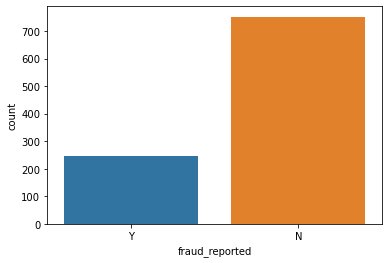

In [349]:
sns.countplot(df['fraud_reported'])

We could see that The  data is imbalanced and we will deal it with appropriate method

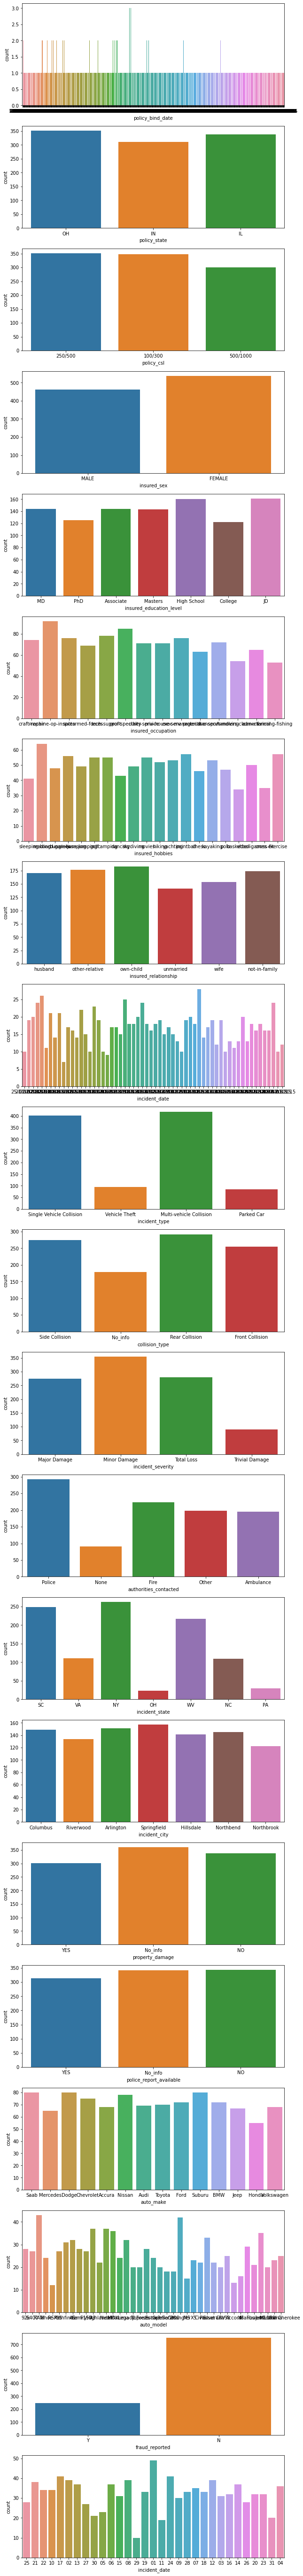

In [350]:
plt.subplots(figsize=(10,100))
plotnumber=1

for i in cat:
    if plotnumber<=21:
        ax=plt.subplot(21,1,plotnumber)
        sns.countplot(df[i])
    plotnumber+=1
plt.show()    

*collision caused maily by female 

*Most of the vehicle collision is caused by High school one followd by jd

*most of the insurance claims happened by own child that is adult followed by other relatives

*The vehicle theft and parked car ahas low incident type 

*most of the claims have reported with rear collision

*Most of claimes have reported only with minor damage

*Most of the claim authority contacted the police followed by fire authority

*The Ny has max amount of claims reported and oh has least no of claims reported

*Most of Claims incident happend in Springfield  followed by Arlington and columbus

*Most of the Property Damage has no proper information

*Most of the claims has no proper repoty also no proper information

*The Honda has low no of claims reported followed by Mercedes and Audi

*The most of the claims happend in the date of 01 followed by 12 and 15 also low no of claims is happenning in the day of 29



Hence we have to analyse the auto model will do it seperatly

<AxesSubplot:xlabel='auto_model', ylabel='count'>

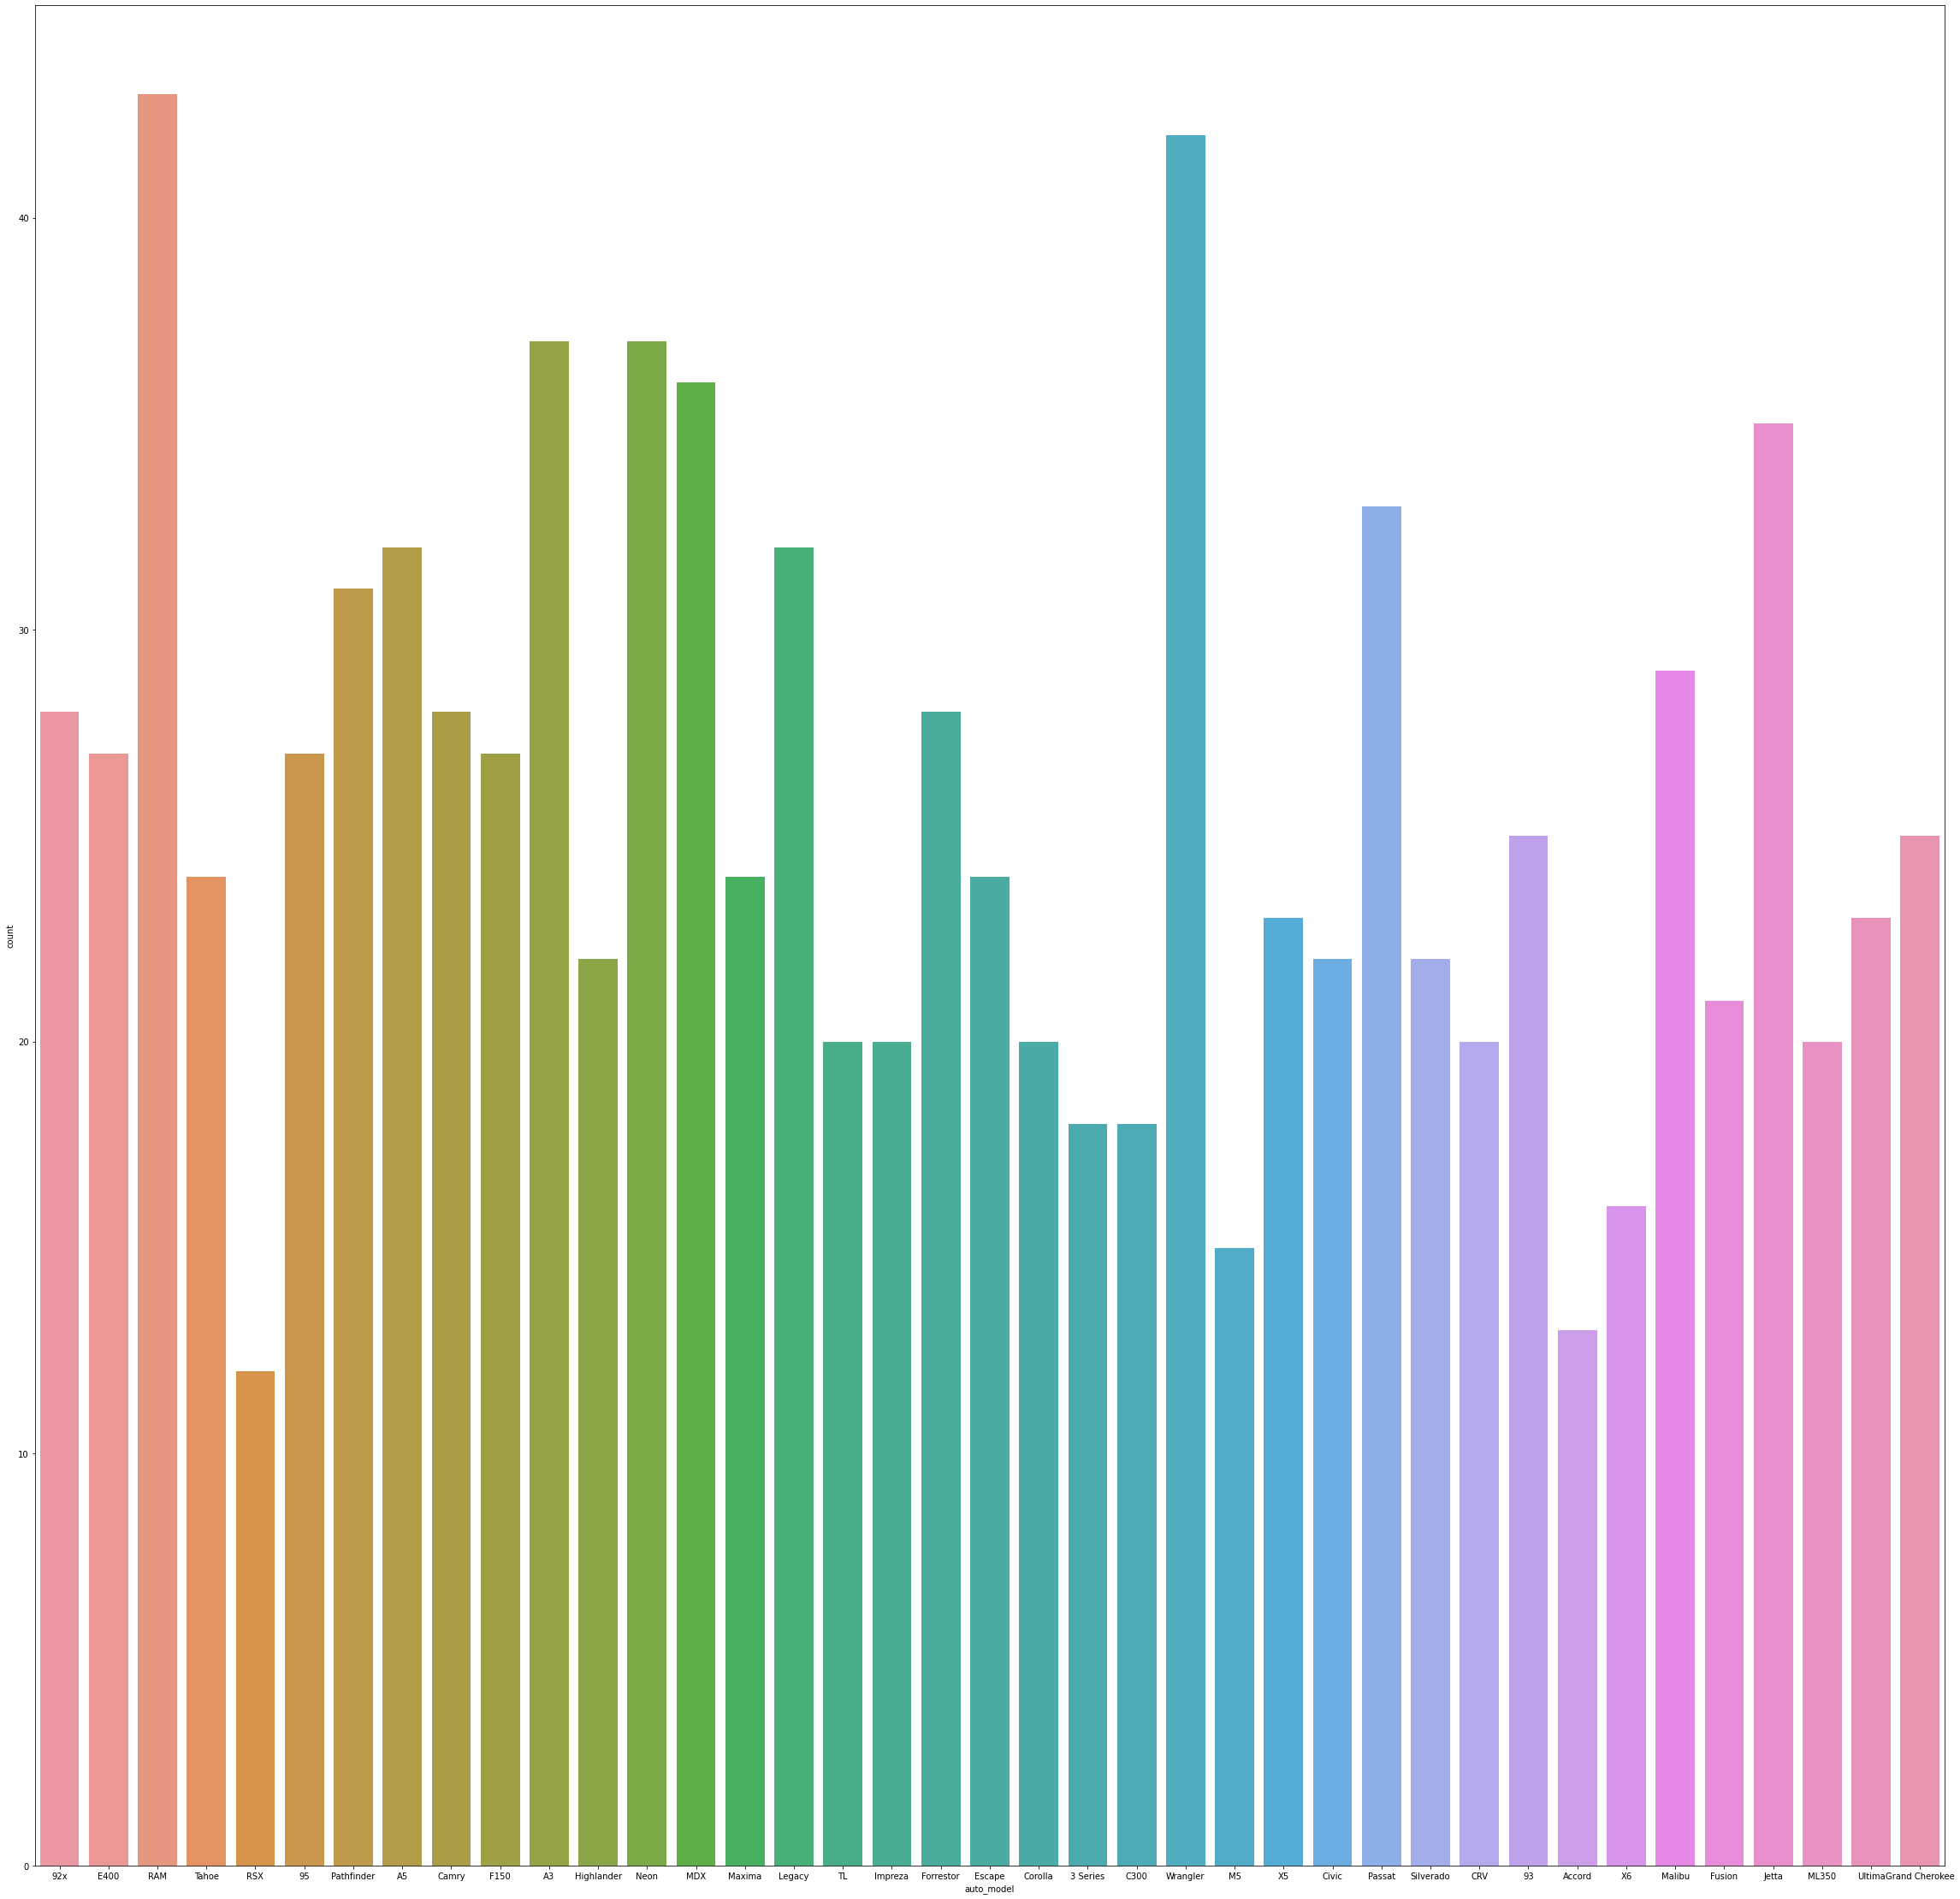

In [351]:
plt.subplots(figsize=(40,40))
sns.countplot(df['auto_model'])

The model Ram and Wrangler has high no of reported claims followed by Jetta and Camry

# BIVARIENT ANALYSIS

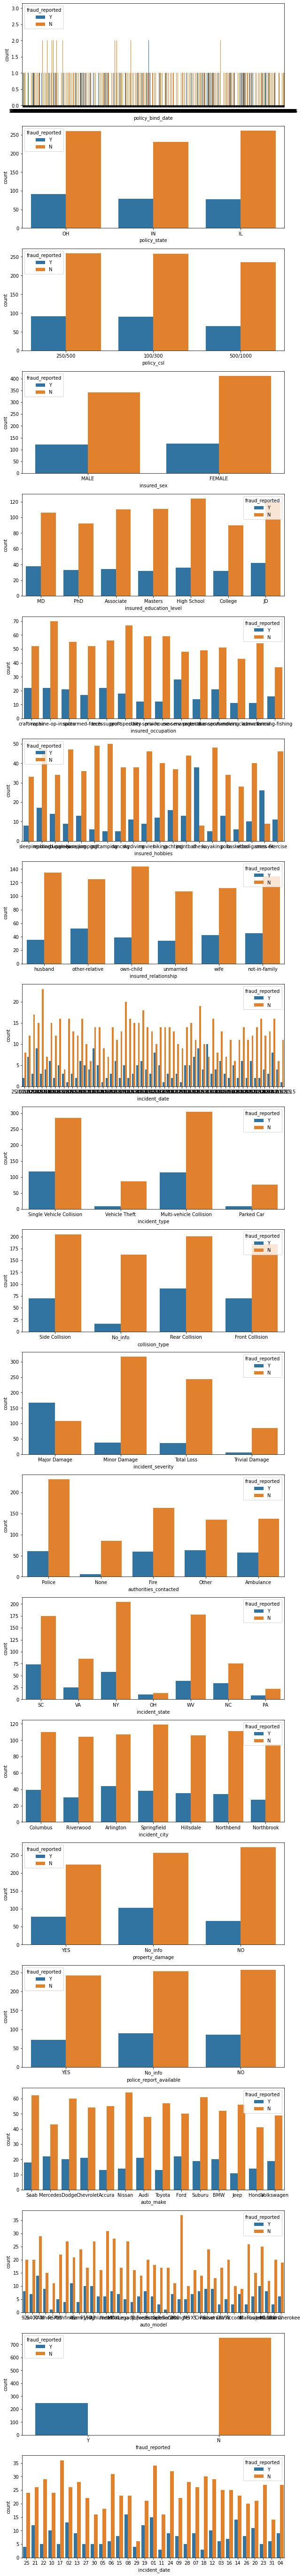

In [352]:
plt.subplots(figsize=(10,100))
plotnumber=1

for i in cat:
    if plotnumber<=21:
        ax=plt.subplot(21,1,plotnumber)
        sns.countplot(x=df[i],hue=df['fraud_reported'],data=df)
    plotnumber+=1
plt.show()    

*According to the data info, cx those having insured relationship with other relative and wife are most reported than others.

*Most of the fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance

*Most of the fraud reported were fonund where incident state was SC, NY, OH, NC and PA

*In all cities fraud reported counts are almost same.

*Most of fraud reported claim are Major Damage , most of them are counted as fraud

*There are very fraud report in Trivial damage.*fraud report were found where number_of_vehicles_involved more than 1

*Most of fraud reported claims in Side Collision, Rear Collision and Front Collision.

*Some of reported claim we have those are in no info of collision type

*We have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type.

*In other two incident type vehicle theft an dparked car are very less fraud report.

*Here we can see the cx those hobbies are Chess, are most fraud reported cx.

*Here we can see the cx those hobbies are cross-fit , are also most fraud reported cx

*After that cx those hobbies are reading, board games, base-jumping, yechting, painball, polo and etc also most fraud report cx than others

*We higher cx those are education level is High School and least cx in PhD and College

*There is very little difference in fraud report in all kind of cx

*Fraud report is little higher in cx those education level is JD, MD, PhD, and College than others.

*We have more cx in Female than the Male

*But fraud reported is little high Male cx

*Here we notice here according to count fraud report high in cx of 2000 policy_deductable

*In all three csl we same kind of similarity fraud report is also common in all policy_csl

*We have cx from three stats and fraud report almost common in all three states.

*We see most of the cx are age of 26 to 50

*Fraud reported is higher in cx 26 to 50 of age.

*Here we notice fraud report is high in policy_vind_Year of 2014, 2006, 1990, 1997, 2002, 1999, 2012, 1998, 1994, 2008, 2003 and etc thanothers

*We can notice we have less vehicle from 1998 and 20010 auto year

*According to vehicle count fraud reported is higher in vehicle of 1996, 2004, 2007, 2011, 2013, 2014 and etc auto year than others

*Most of auto_model we see in Wrangler, RAM , Pathfinder, Neon and etc.

*We can notice Fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, M5, CIVIC, SILVERADOX6 ML300 and etc auto_models

*Fraud reported claim is higher in Saab, Merceded, Dodge, Chevrolet, Audi , Ford, Suburu BMW and volkswagen auto_make

*In Other Auto_make brand is less than other.

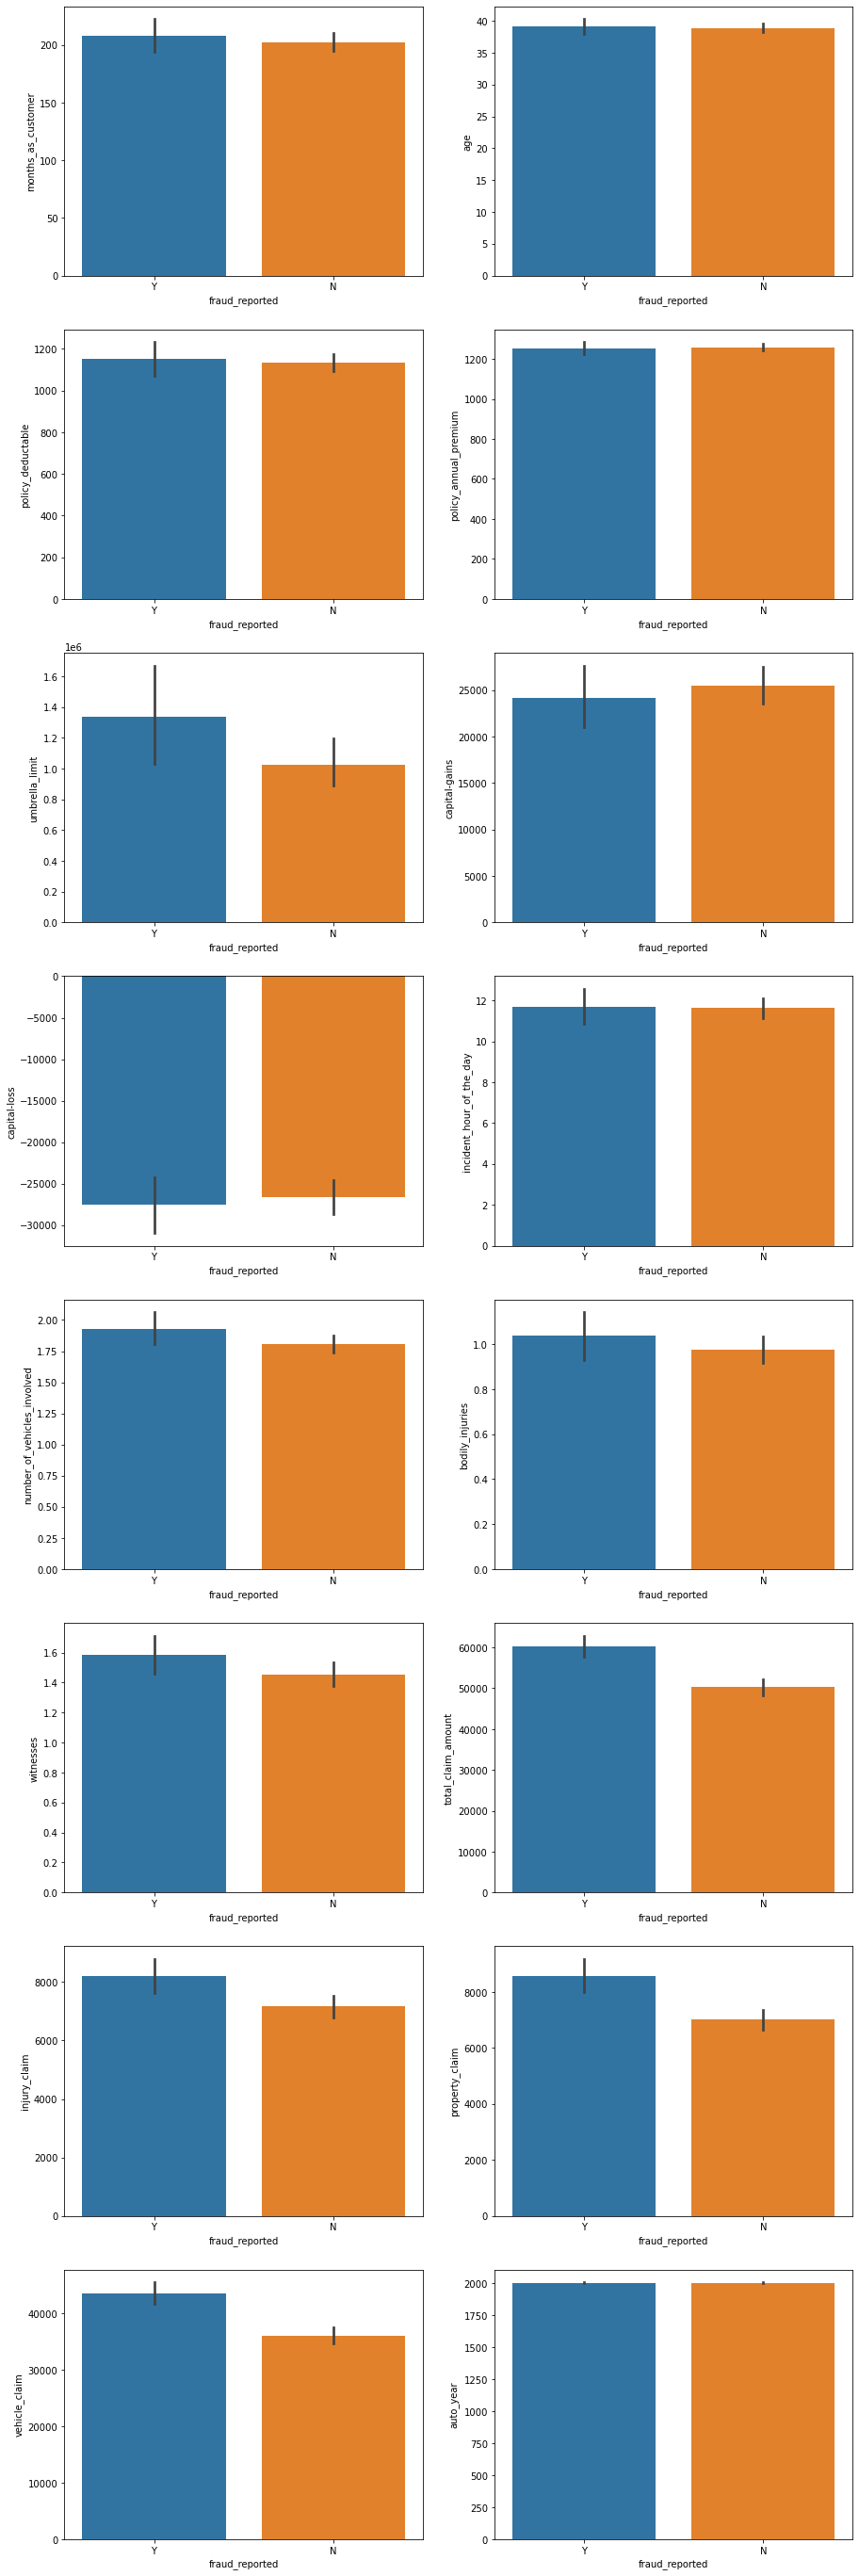

In [353]:
plt.subplots(figsize=(15,100))
plotnumber=1

for i in num:
    if plotnumber<=16:
        ax=plt.subplot(16,2,plotnumber)
        sns.barplot(y=df[i],x=df['fraud_reported'],data=df)
    plotnumber+=1
plt.show()    

*Most of fraud reported we see in cx those capital loss are and -40000 to -60000

*Most of the fraud reported are in cx those capital gains are 0 and around 50000

*In vehicle_claim most of the cx are between 100 to 6500

*Fraud report is higher in cx are between 3500 to 5500 vehicle_claim

*In Property claim fraud reported is higher in cx claimed of 5000 to 8000

*Most of the cx injury claim is 100 to 15000

*Most fraud reported cx are between 5000 to 8000 injury claim

*Most of cx we have their umbrella limit is 0

*fraud reported is also high those cx

*Most of cx we have 1000 to 1500 of premiums payers

*Most of the fraud reported we found in those premium is 1250 to 1300

*Most of the cx are 100 to 300 months old

*We can notice here fraud reort is high in cx between 100 to 250 months old

# MULTIVATIENT ANALYSIS:

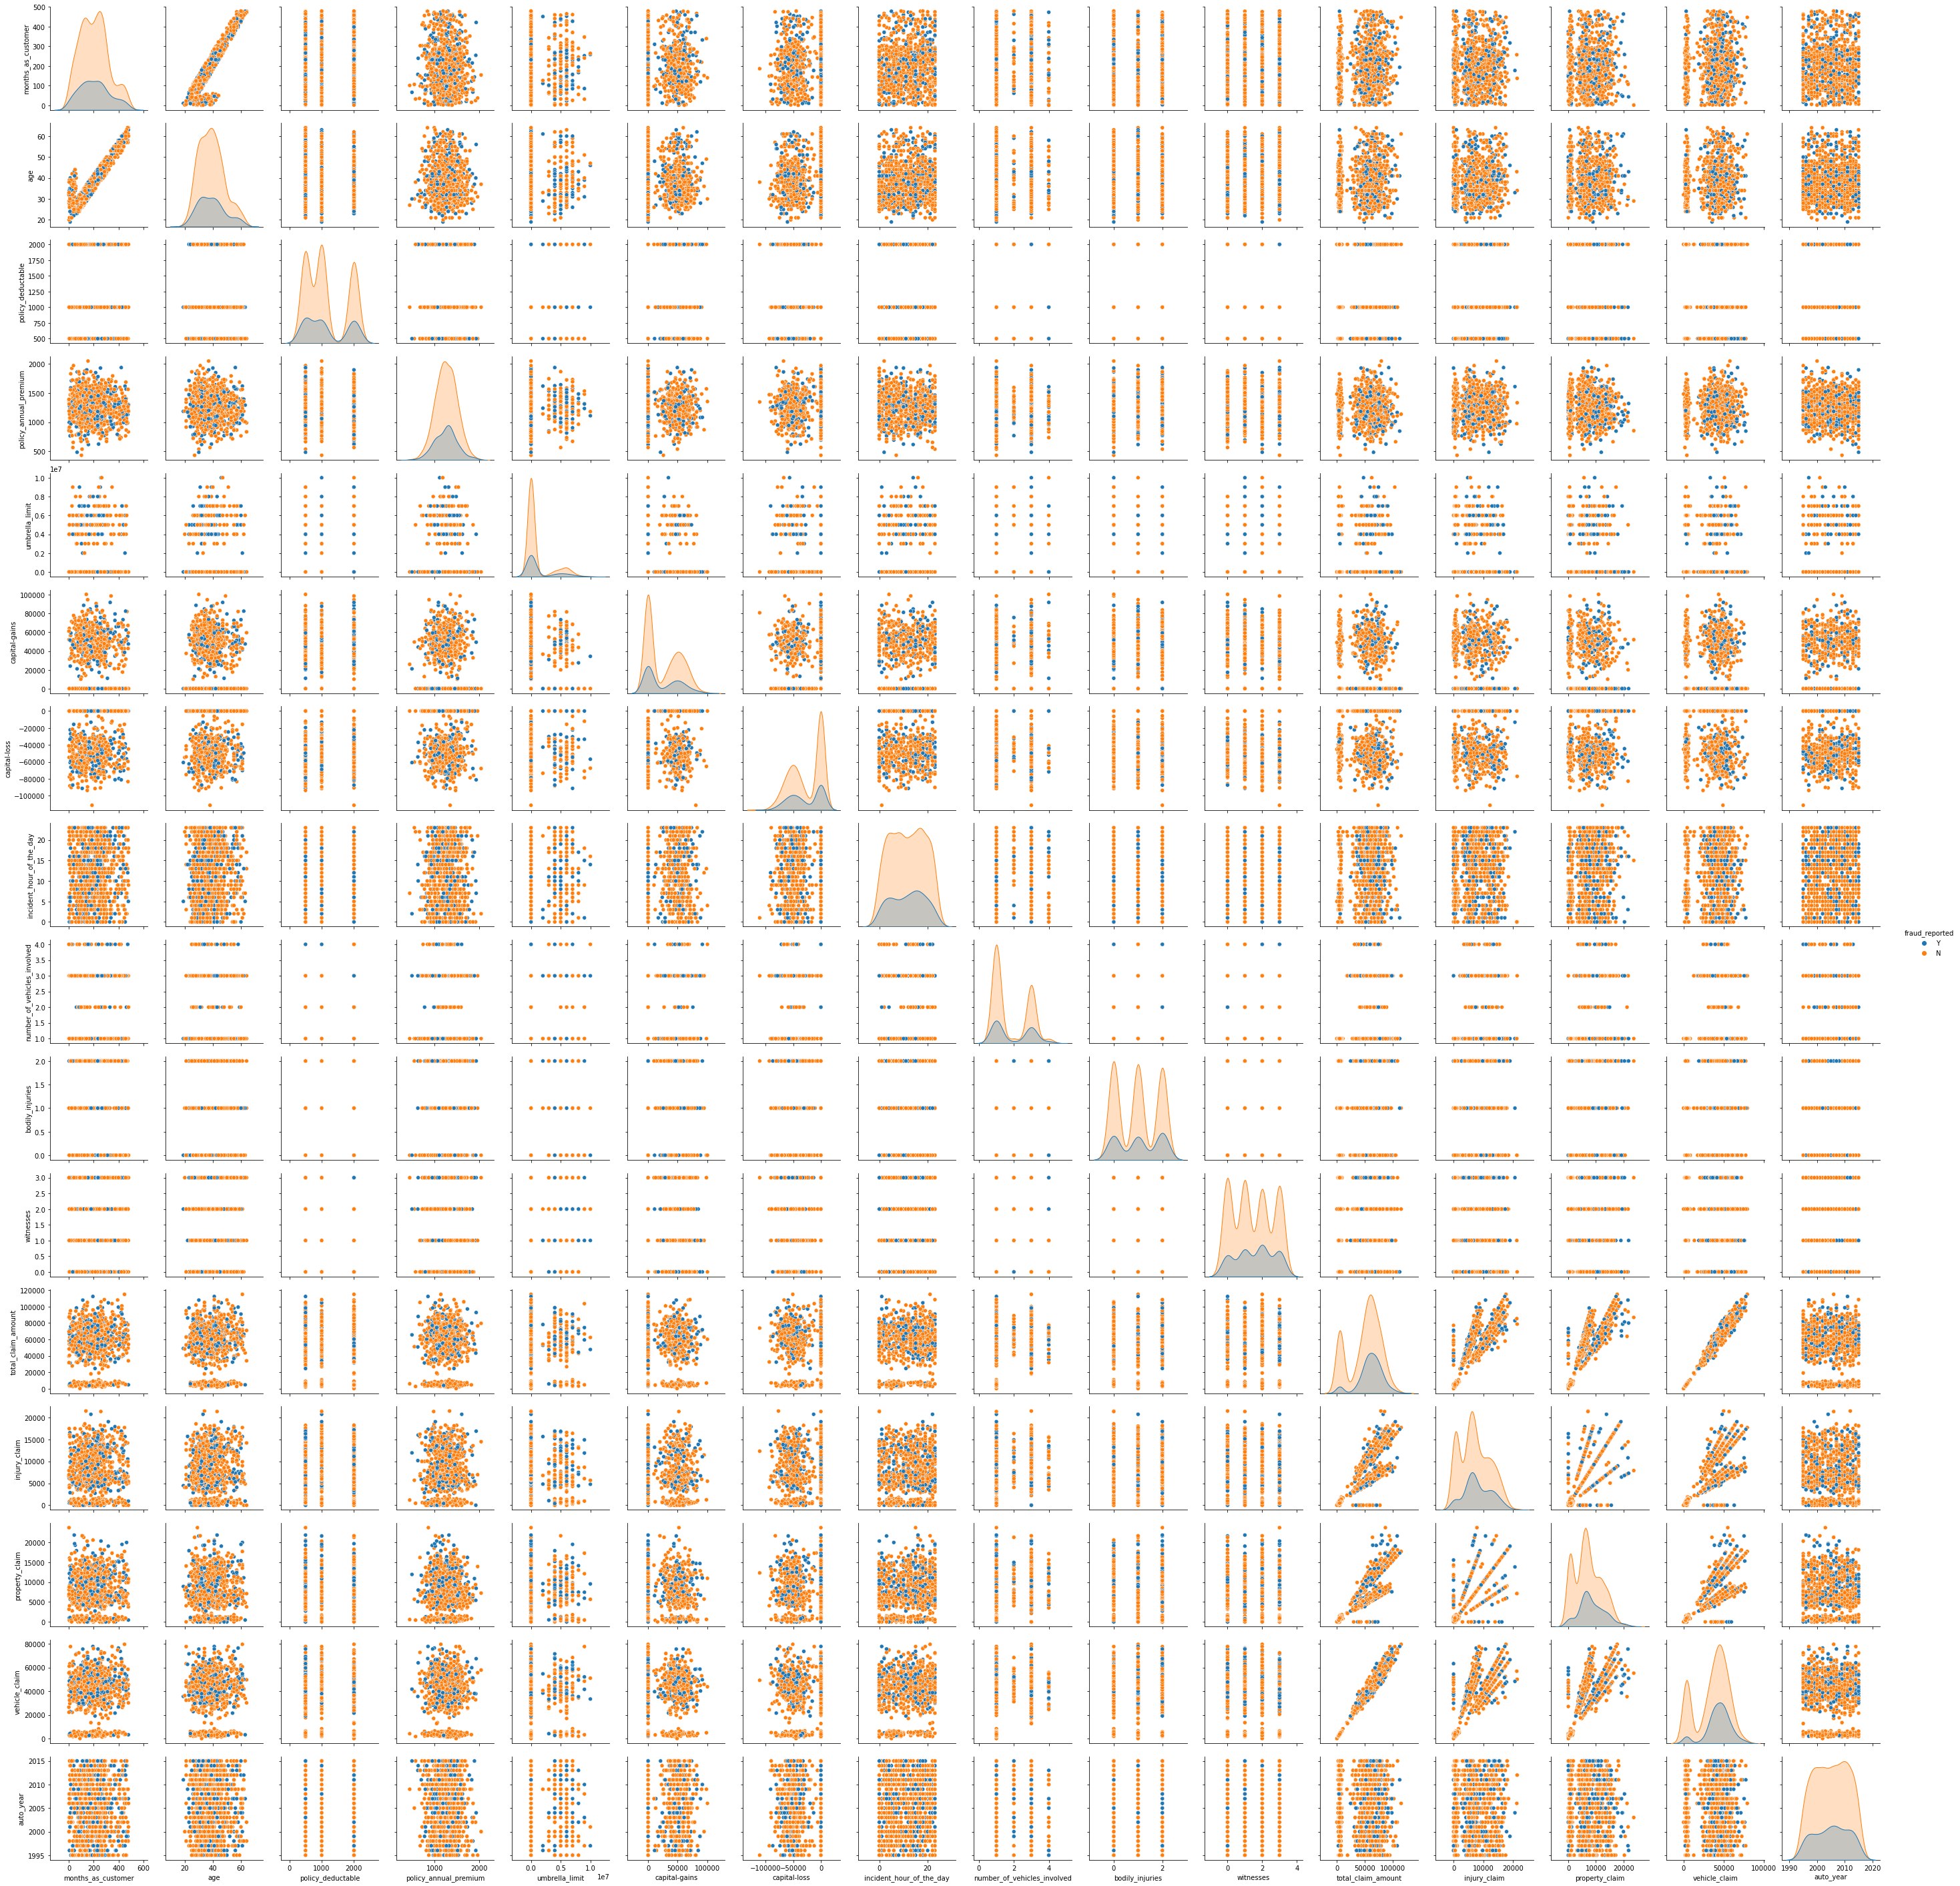

In [356]:
sns.pairplot(df,hue='fraud_reported')

We could observe some linear corr of the dataset 
There are skewness find in the dataset .

SKEWNESS AND OUTLIERS HANDLING:

In [355]:
df[num].skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

OBSERVATION:
    *Umbrella limit,total_Claim_amount,vehicle Claim have skewness will handle it .

In [357]:
from sklearn.preprocessing import power_transform

In [358]:
df[['vehicle_claim','total_claim_amount','umbrella_limit']]=power_transform(df[['vehicle_claim','total_claim_amount','umbrella_limit']],method='yeo-johnson')

In [360]:
df[num].skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.492893
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.511002
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.523647
auto_year                     -0.049502
dtype: float64

Here we could find that the skewness of the data has been removed let us proceed further to find the ouliers and handle it

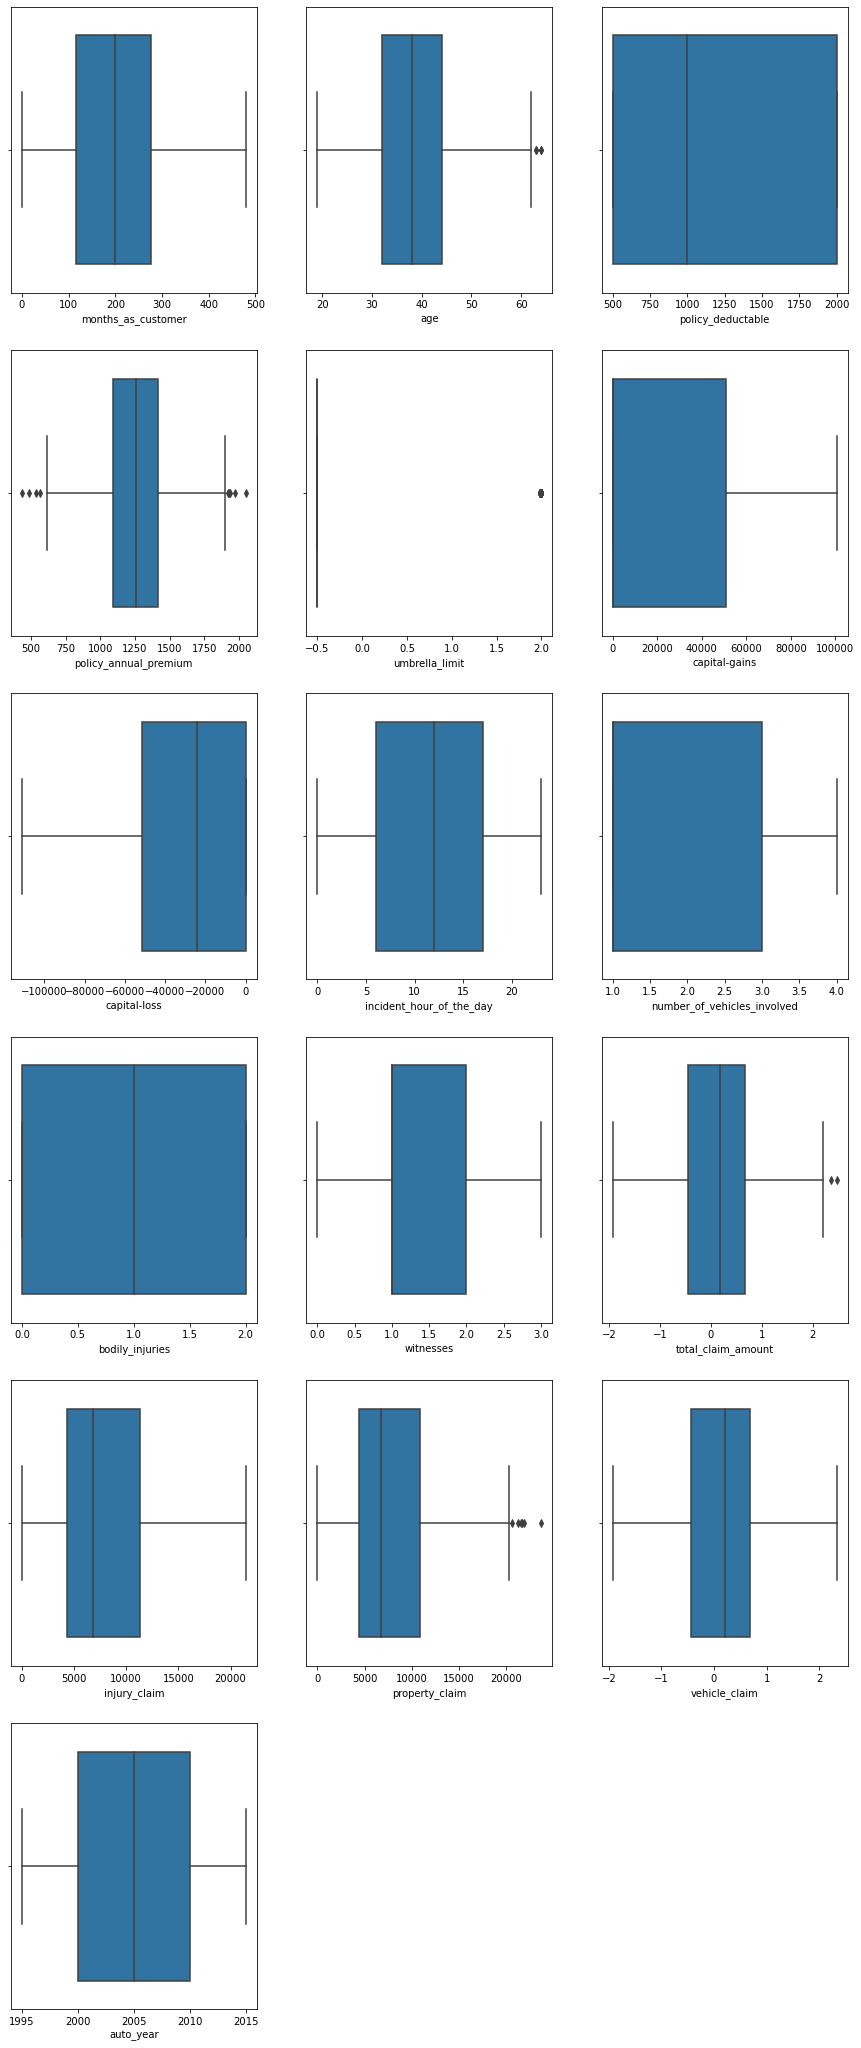

In [361]:
plt.subplots(figsize=(15,100))
plotnumber=1

for i in num:
    if plotnumber<=16:
        ax=plt.subplot(16,3,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()    

OBSERVATION:
    Presence of Outliers in property_claim,total_claim_amount,policy annual_premium and age 

In [362]:
from scipy.stats import zscore

z=np.abs(zscore(df[num]))

print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [363]:
df_1=df[(z<3).all(axis=1)]

In [364]:
print('Before_outliers_removal:',df.shape)

Before_outliers_removal: (999, 42)


In [365]:
print('after outliers Removal:',df_1.shape)

after outliers Removal: (994, 42)


The data loss is too low let us proceed futher

# ENCODING:

In [366]:
from sklearn.preprocessing import LabelEncoder

In [367]:
le=LabelEncoder()
for j in cat:
    df_1[j]=le.fit_transform(df_1[j].astype(str))

In [368]:
df_1.shape

(994, 42)

In [369]:
df_1

months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                   328   48               530             2           1   
1                   228   42               817             1           1   
2                   134   29               185             2           0   
3                   256   41               762             0           1   
4                   228   44               180             0           2   
..                  ...  ...               ...           ...         ...   
995                   3   38               485             2           2   
996                 285   41               128             0           0   
997                 130   34               507             2           1   
998                 458   62               571             0           2   
999                 456   60               357             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0                 1000                1406.91       -0.501876            1   
1                 2000                1197.22        1.992256            1   
2                 2000                1413.14        1.992256            0   
3                 2000                1415.74        1.993445            0   
4                 1000                1583.91        1.993445            1   
..                 ...                    ...             ...          ...   
995               1000                1310.80       -0.501876            0   
996               1000                1436.79       -0.501876            0   
997                500                1383.49        1.988548            0   
998               2000                1356.92        1.992256            1   
999               1000                 766.19       -0.501876            0   

     insured_education_level  ...  auto_make  auto_model  auto_year  \
0                          4  ...         10           1       2004   
1                          4  ...          8          12       2007   
2                          6  ...          4          30       2007   
3                          6  ...          3          34       2014   
4                          0  ...          0          31       2009   
..                       ...  ...        ...         ...        ...   
995                        5  ...          6           6       2006   
996                        6  ...         13          28       2015   
997                        5  ...         11          19       1996   
998                        0  ...          1           5       1998   
999                        0  ...          8          12       2007   

     fraud_reported   incident_date  incident_Month  incident_Year  \
0                 1              24               0              0   
1                 1              20               0              0   
2                 0              21               1              0   
3                 1               9               0              0   
4                 0              16               1              0   
..              ...             ...             ...            ...   
995               0              21               1              0   
996               0              23               0              0   
997               0              22               0              0   
998               0              25               1              0   
999               0              25               1              0   

     policy_bind_Date  policy_bind_Month  policy_bind_Year  
0                  16                  9                24  
1                  26                  5                16  
2                   5                  8                10  
3                  24                  4                 0  
4                   5                  5                24  
..                ...                ...               ...  
995                15             

# NOW SPLIT THE DATA IN IT X AND  Y

In [370]:
x = df_1.drop(['fraud_reported'],axis=1)
y = df_1['fraud_reported']

In [314]:
from sklearn.preprocessing import StandardScaler

In [371]:
scaled=StandardScaler()

In [372]:
x_scaled=scaled.fit_transform(x)

In [374]:
pd.DataFrame(x).isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

# IMBALANCED DATASET

NOW WILL USE OVERSAMPLING 

Because there is less data in Churn for yes

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

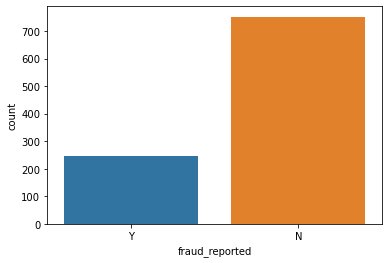

In [375]:
sns.countplot(x='fraud_reported',data=df)

Hence we could see that Y nd N,its totally imbalanced 

In [376]:
from imblearn.over_sampling import SMOTE

In [378]:
sm=SMOTE()

In [385]:
x,y=sm.fit_resample(x,y)

In [386]:
y.shape

(1496,)

In [389]:
y.value_counts()

1    748
0    748
Name: fraud_reported, dtype: int64

Now our data is balanced hence we will proceed further

# Train_Test_Split

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

# Model Building

In [395]:
# importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [397]:
logreg=LogisticRegression()

In [401]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.5567928730512249
[[119 100]
 [ 99 131]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.54       219
           1       0.57      0.57      0.57       230

    accuracy                           0.56       449
   macro avg       0.56      0.56      0.56       449
weighted avg       0.56      0.56      0.56       449



In [399]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

# prediction
predRFC=RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8596881959910914
[[187  32]
 [ 31 199]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       219
           1       0.86      0.87      0.86       230

    accuracy                           0.86       449
   macro avg       0.86      0.86      0.86       449
weighted avg       0.86      0.86      0.86       449



In [400]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

# prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.77728285077951
[[162  57]
 [ 43 187]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       219
           1       0.77      0.81      0.79       230

    accuracy                           0.78       449
   macro avg       0.78      0.78      0.78       449
weighted avg       0.78      0.78      0.78       449



In [408]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [409]:
svc=SVC()
svc.fit(x_train,y_train)

# prediction
predsvc=svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.5545657015590201
[[116 103]
 [ 97 133]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       219
           1       0.56      0.58      0.57       230

    accuracy                           0.55       449
   macro avg       0.55      0.55      0.55       449
weighted avg       0.55      0.55      0.55       449



In [410]:
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.6859688195991092
[[130  89]
 [ 52 178]]
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       219
           1       0.67      0.77      0.72       230

    accuracy                           0.69       449
   macro avg       0.69      0.68      0.68       449
weighted avg       0.69      0.69      0.68       449



In [411]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8619153674832962
[[187  32]
 [ 30 200]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       219
           1       0.86      0.87      0.87       230

    accuracy                           0.86       449
   macro avg       0.86      0.86      0.86       449
weighted avg       0.86      0.86      0.86       449



In [412]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# prediction
predABC=ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8485523385300668
[[185  34]
 [ 34 196]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       219
           1       0.85      0.85      0.85       230

    accuracy                           0.85       449
   macro avg       0.85      0.85      0.85       449
weighted avg       0.85      0.85      0.85       449



In [414]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)

# prediction
predNB=NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test, predNB))

0.7149220489977728
[[117 102]
 [ 26 204]]
              precision    recall  f1-score   support

           0       0.82      0.53      0.65       219
           1       0.67      0.89      0.76       230

    accuracy                           0.71       449
   macro avg       0.74      0.71      0.70       449
weighted avg       0.74      0.71      0.71       449



Here GradientBoostclasifier has a better score let check the cross val score and proceed further

# Cross_val_score

In [415]:
print(cross_val_score(svc ,x,y,cv=5).mean())

0.5467892976588629


In [416]:
# cv score for KNN Classifier
print(cross_val_score(knn ,x,y,cv=5).mean())

0.7212664437012263


In [417]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB ,x,y,cv=5).mean())

0.8590323299888517


In [418]:
# cv score for Ada Boost Classifier
print(cross_val_score(ABC ,x,y,cv=5).mean())

0.8350033444816054


In [419]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB ,x,y,cv=5).mean())

0.7159598662207357


# HyperParameter Tuning:

In [430]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' :['mse','mae'],
    'n_estimators' :[100,200],
    'learning_rate' :[0.1,0.5,1.0],
     'random_state' :[5],
}

In [435]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)


In [436]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8641425389755011


we could obeserve that after parameter tuning the accracy increased by mimimal percentage means our model is in best it condition

In [437]:
print("Classification Report::\n",classification_report(y_test,best_adb_pred))

Classification Report::
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       219
           1       0.87      0.87      0.87       230

    accuracy                           0.86       449
   macro avg       0.86      0.86      0.86       449
weighted avg       0.86      0.86      0.86       449



In [438]:
from sklearn.metrics import roc_auc_score

In [439]:
print("roc auc score::",roc_auc_score(y_test,best_adb_pred))

roc auc score:: 0.8640063529878895


In [440]:
from sklearn.metrics import roc_curve

In [441]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred)

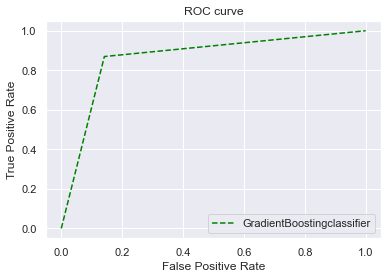

In [443]:
# plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1,linestyle='--',color='green', label='GradientBoostingclassifier')

plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

In [462]:
import joblib
joblib.dump(best_adb_grid.best_estimator_,'InsuranceClaims-FraudDetection.obj')

['InsuranceClaims-FraudDetection.obj']

In [463]:
# loading the saved model
model=joblib.load("InsuranceClaims-FraudDetection.obj")

# Prediction
prediction = model.predict(x_test)
prediction


array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [464]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0            1         1
1            1         1
2            0         0
3            1         1
4            0         1
..         ...       ...
444          0         0
445          0         1
446          0         0
447          0         0
448          0         0

[449 rows x 2 columns]